# CNN in Pytorch

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
print(torch.__version__)

1.6.0


In [8]:
def load_dataset(data_dir):
    data_path = data_dir
    mean_nums = [0.485, 0.456, 0.406]
    std_nums = [0.229, 0.224, 0.225]
    transform = transforms.Compose([
                              transforms.RandomResizedCrop(size=256),
                              transforms.ToTensor(),
                              transforms.Normalize(mean_nums, std_nums),
                              ])
    dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transform
    )
    loader = torch.utils.data.DataLoader(
        dataset,
        batch_size=64,
        num_workers=0,
        shuffle=True
    )
    return loader

In [65]:
train_data_dir="D:\\JCProjects\\DataCafe\\train\\"
test_data_dir="D:\\JCProjects\\DataCafe\\test\\"

In [66]:
# defining trainloader and testloader
train_loader = load_dataset(train_data_dir)
test_loader = load_dataset(test_data_dir)

In [67]:
# shape of training data
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 3, 256, 256])
torch.Size([64])


TypeError: Invalid shape (3, 256, 256) for image data

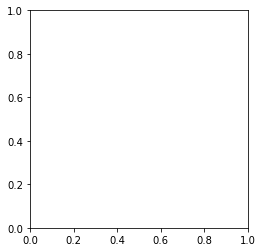

In [68]:
# visualizing the training images
image_show = images[0].numpy().squeeze()/255.0
plt.imshow(image_show)

In [69]:
# shape of validation data
dataiter = iter(test_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 3, 256, 256])
torch.Size([64])


## Defining Model Architecture

In [70]:
#tf.keras.layers.Conv2D(
#    filters, kernel_size, strides=(1, 1), padding='valid', data_format=None,
#    dilation_rate=(1, 1), groups=1, activation=None, use_bias=True,
#    kernel_initializer='glorot_uniform', bias_initializer='zeros',
#    kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
#    kernel_constraint=None, bias_constraint=None, **kwargs)

#tf.keras.layers.MaxPool2D(
#    pool_size=(2, 2), strides=None, padding='valid', 
#    data_format=None, **kwargs)

#torch.nn.Conv2d(in_channels: int, out_channels: int, 
#                kernel_size: Union[int, Tuple[int, int]], 
#                stride: Union[int, Tuple[int, int]] = 1, 
#                padding: Union[int, Tuple[int, int]] = 0, 
#                dilation: Union[int, Tuple[int, int]] = 1, 
#                groups: int = 1, bias: bool = True, 
#                padding_mode: str = 'zeros')

#torch.nn.BatchNorm2d( num_features , eps = 1e-05 , 
#      momentum = 0.1 , affine = True , track_running_stats = True )

#torch.nn.MaxPool2d(kernel_size: Union[T, Tuple[T, ...]], 
#      stride: Optional[Union[T, Tuple[T, ...]]] = None, 
#      padding: Union[T, Tuple[T, ...]] = 0, 
#      dilation: Union[T, Tuple[T, ...]] = 1, 
#      return_indices: bool = False, ceil_mode: bool = False)

# defining the model architecture
class Net(nn.Module):   
    def __init__(self):
        super(Net, self).__init__()
        
        self.cnn_layers = nn.Sequential(
          # Defining 2D convolution layer 1
          nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(32),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2),
          # Defining 2D convolution layer 2
          nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2),
          # Defining 2D convolution layer 3
          nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(32),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2),
          # Defining 2D convolution layer 4
          nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2),
          # Defining 2D convolution layer 5
          nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(32),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2),
          # Defining 2D convolution layer 6
          nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2)
        )
        
        self.linear_layers = nn.Sequential(
          nn.Linear(1024, 128)
        )

  # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [71]:
#torch_cuda_available = torch.cuda.is_available()
torch_cuda_available = False

In [72]:
# defining the model
model = Net()
# defining the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0005)
# defining the loss function
criterion = nn.CrossEntropyLoss()
# checking if GPU is available
if torch_cuda_available:
    model = model.cuda()
    criterion = criterion.cuda()
elif torch_cuda_available == False:
    model = model.cpu()
    criterion = criterion.cpu()
    
print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True

In [73]:
for i in range(20):
    running_loss = 0
    for images, labels in train_loader:

        if torch_cuda_available:
            images = images.cuda()
            labels = labels.cuda()
        elif torch_cuda_available == False:
            images = images.cpu()
            labels = labels.cpu()

        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(i+1, running_loss/len(train_loader)))


Epoch 1 - Training loss: 0.5825819967270914
Epoch 2 - Training loss: 0.4914588834176948
Epoch 3 - Training loss: 0.4618888733737758
Epoch 4 - Training loss: 0.43790827437377433
Epoch 5 - Training loss: 0.422542132897926
Epoch 6 - Training loss: 0.4100342303641569
Epoch 7 - Training loss: 0.3893292155791956
Epoch 8 - Training loss: 0.3783218760226073
Epoch 9 - Training loss: 0.36904521820260516
Epoch 10 - Training loss: 0.35883035283607206
Epoch 11 - Training loss: 0.35720151828041974
Epoch 12 - Training loss: 0.34470554986106816
Epoch 13 - Training loss: 0.33650140769318987
Epoch 14 - Training loss: 0.32650817524014253
Epoch 15 - Training loss: 0.3216790548964604
Epoch 16 - Training loss: 0.31395308724217325
Epoch 17 - Training loss: 0.31215093286433965
Epoch 18 - Training loss: 0.30661227164873434
Epoch 19 - Training loss: 0.2988033702632766
Epoch 20 - Training loss: 0.2937399610273365


In [74]:
# getting predictions on test set and measuring the performance
correct_count, all_count = 0, 0
for images,labels in test_loader:
    for i in range(len(labels)):
        if torch_cuda_available:
            images = images.cuda()
            labels = labels.cuda()
        elif torch_cuda_available == False:
            images = images.cpu()
            labels = labels.cpu()
        img = images[i].view(1, 3, 256, 256)
        with torch.no_grad():
            logps = model(img)

    
        ps = torch.exp(logps)
        probab = list(ps.cpu()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.cpu()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 30000

Model Accuracy = 0.5595666666666667


In [75]:
# save the model
PATH="D:\\JCProjects\\DataCafe\\DataNew\\model1008.pth"
torch.save(model.state_dict(), PATH)

In [76]:
modelB = Net()
modelB.load_state_dict(torch.load(PATH), strict=False)

<All keys matched successfully>